# Exploratory Data Analysis

In [89]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from skimage.io import imread, imshow
from skimage import transform, img_as_float, filters
from skimage.color import rgb2gray
import glob
import math
from importlib import reload
import scipy

In [90]:
cwd = os.getcwd()
path = os.path.join(cwd, '..', 'src')
if not path in sys.path:
    sys.path.append(path)
del cwd, path

In [91]:
import KaggleAmazonMain

In [98]:
reload(KaggleAmazonMain)

<module 'KaggleAmazonMain' from 'C:\\Users\\ablin\\Documents\\Kaggle\\kaggle_UnderstandingAmazonFromSpace\\develop\\..\\src\\KaggleAmazonMain.py'>

In [5]:
X_train, y_train, names_train, tagged_df = KaggleAmazonMain.load_training_data()

cwd C:\Users\ablin\Documents\Kaggle\kaggle_UnderstandingAmazonFromSpace\develop
Loading jpg image dataset


In [6]:
X_train.shape

(100, 256, 256, 3)

In [7]:
tagged_df.head()

,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
image_name,,,,,,,,,,,,,,,,,
train_0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
train_1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
train_10,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1
train_100,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
train_1000,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


There are 17 unique tags in this data


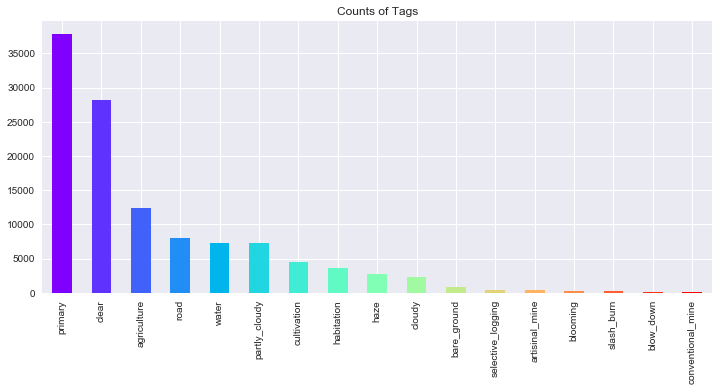

primary              37840
clear                28203
agriculture          12338
road                  8076
water                 7262
partly_cloudy         7251
cultivation           4547
habitation            3662
haze                  2695
cloudy                2330
bare_ground            859
selective_logging      340
artisinal_mine         339
blooming               332
slash_burn             209
blow_down              101
conventional_mine      100
dtype: int64

In [8]:
#Barplot of tag counts
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 5)
print('There are {} unique tags in this data'.format(len(tagged_df.columns)))
colors = cm.rainbow(np.linspace(0, 1, len(tagged_df.columns)))
tagged_df.sum().sort_values(ascending=False).plot(title="Counts of Tags", color=colors, kind='bar')
plt.show()
tagged_df.sum().sort_values(ascending=False)

# Load Image Data

In [9]:
len(y_train)

100

In [10]:
# 100 files, images are 256x256 pixels, with a channel dimension size 3 = RGB
print('X_train is a {} object'.format(type(X_train)))
print('it has shape {}'.format(X_train.shape))

X_train is a <class 'numpy.ndarray'> object
it has shape (100, 256, 256, 3)


In [11]:
print('y_train is a {} object'.format(type(y_train)))
print('it has {} elements'.format(len(y_train)))
print('each element is of type {}'.format(type(y_train[0])))
print('and the elements are of size {}'.format(y_train[0].shape))

y_train is a <class 'list'> object
it has 100 elements
each element is of type <class 'pandas.core.series.Series'>
and the elements are of size (17,)


In [12]:
print('names_train is a {} object'.format(type(names_train)))
print('it has {} elements'.format(len(names_train)))
print('each element is of type {}'.format(type(names_train)))

names_train is a <class 'list'> object
it has 100 elements
each element is of type <class 'list'>


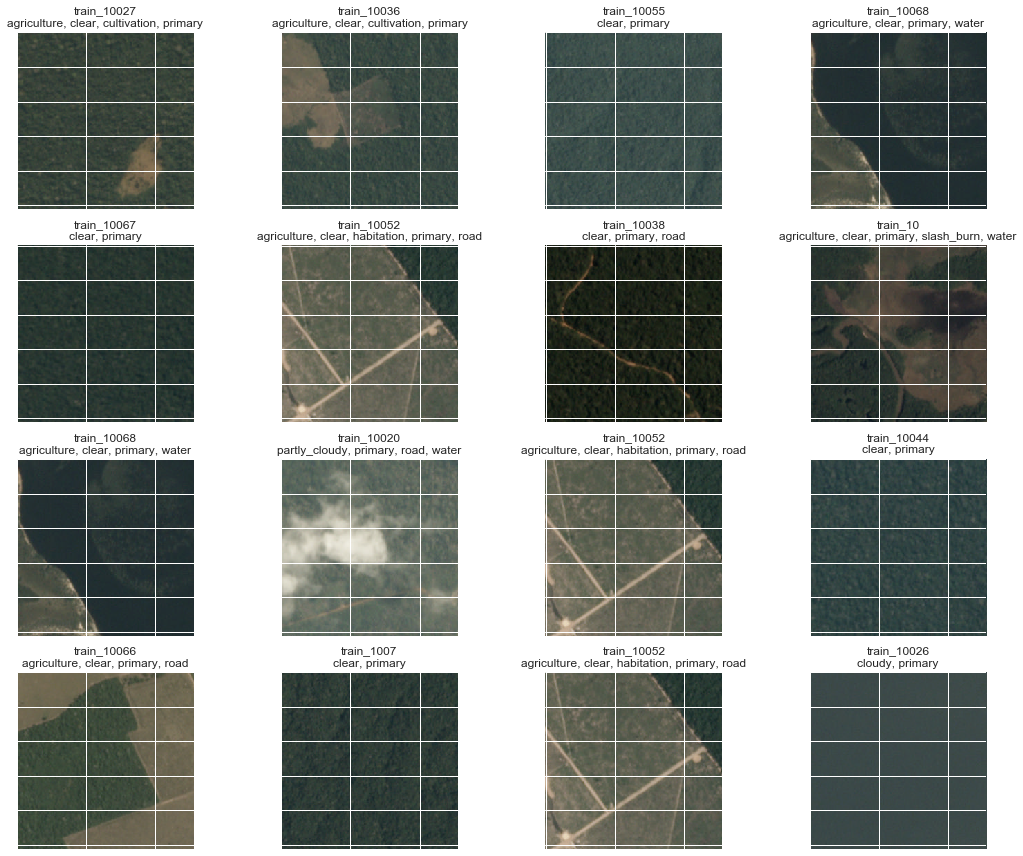

In [13]:
KaggleAmazonMain.plot_samples(X_train, names_train, tagged_df, 4,4)

# Feature Engineering
What type of features are we working with here?

(-0.5, 255.5, 255.5, -0.5)

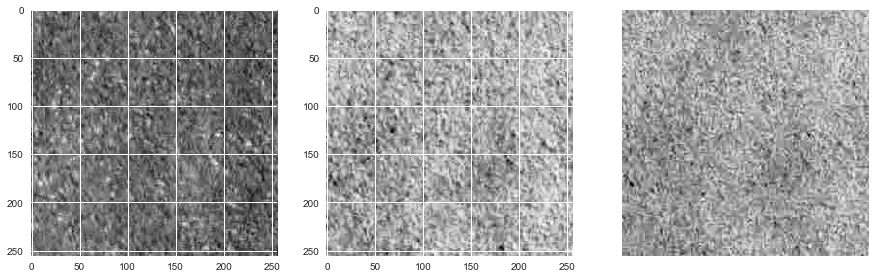

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 12))
axes[0].imshow(X_train[0,:,:,0], cmap='gray')
axes[1].imshow(X_train[0,:,:,1])
axes[2].imshow(X_train[0,:,:,2])
plt.axis('off')

In [15]:
pics = ['train_10039', 'train_10059', 'train_10034']

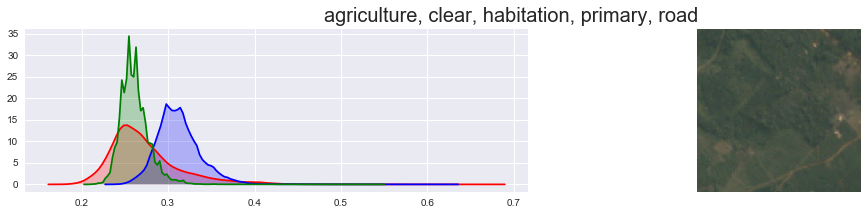

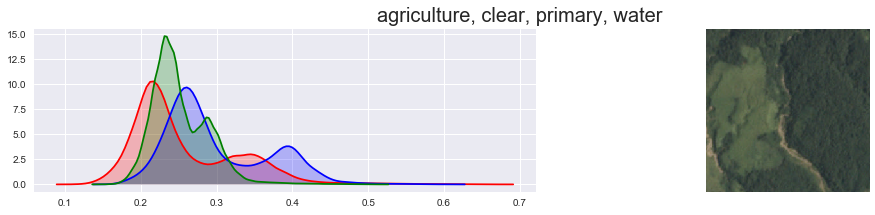

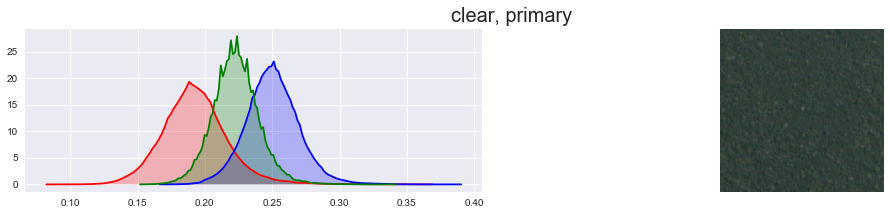

In [16]:
plt.subplots_adjust(wspace=0, hspace=0)
for i in range(0,3):
    sample = np.random.randint(low=0, high=X_train.shape[0]-1, size = 1)
    ind = names_train[sample[0]]
    tags = KaggleAmazonMain.get_labels(ind, tagged_df)
    KaggleAmazonMain.plot_rgb_dist(X_train[sample[0],:,:,:],tags)

C:\Users\ablin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


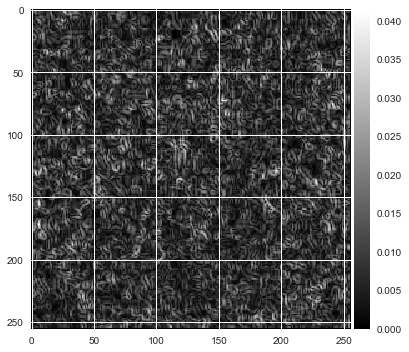

In [17]:
imshow(filters.sobel(rgb2gray(X_train[0,:,:,:])), cmap='gray')

In [18]:
X_train_g = rgb2gray(X_train)

X_train_sobel = []
for i in range(X_train_g.shape[0]):
    X_train_sobel.append(filters.sobel(X_train_g[i]))
X_train_sobel = np.asarray(X_train_sobel)

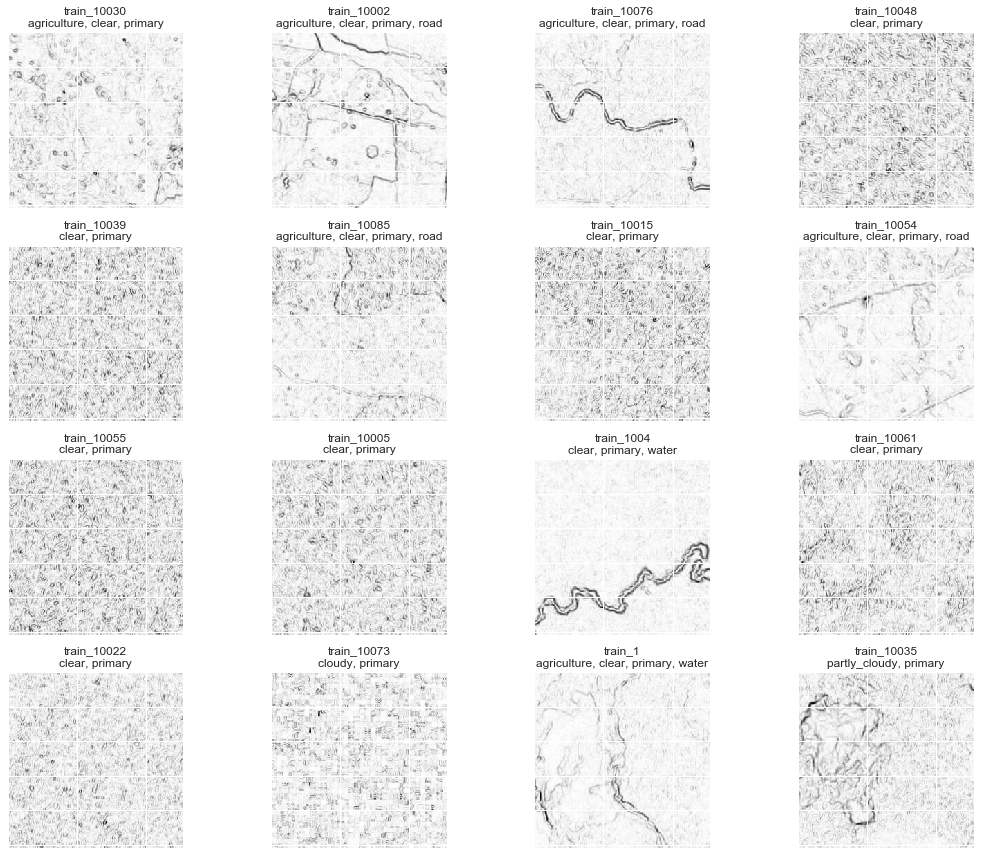

In [19]:
KaggleAmazonMain.plot_samples(X_train_sobel, names_train, tagged_df, 4,4)

In [20]:
X_train_sobel = KaggleAmazonMain.xform_to_sobel(X_train)

In [73]:
len(y_train)

100

In [78]:
pd.DataFrame(y_train)

,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
train_0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
train_1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
train_10,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1
train_100,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
train_1000,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
train_10000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
train_10001,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
train_10002,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
train_10003,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
train_10004,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [99]:
features = KaggleAmazonMain.get_features(X_train)

In [64]:
KaggleAmazonMain.

(256, 256, 3)

In [100]:
features.head()

,b_bimodal,b_kurtosis,b_max,b_mean,b_min,b_skew,b_std,g_bimodal,g_kurtosis,g_max,...,r_skew,r_std,sobel_colmean_std,sobel_kurtosis,sobel_max,sobel_mean,sobel_min,sobel_rowmean_std,sobel_skew,sobel_std
0,0.0,1.685229,0.894118,0.319456,0.003922,1.215532,0.142185,0.0,1.687856,0.894118,...,1.215765,0.141849,0.005138,1.217262,0.041441,0.008595,0.0,0.001003,0.924947,0.005138
1,0.0,1.685229,0.894118,0.319456,0.003922,1.215532,0.142185,0.1,1.687856,0.894118,...,1.215765,0.141849,0.013688,11.418476,0.155384,0.016621,0.0,0.003938,2.547510,0.013688
2,0.1,1.685229,0.894118,0.319456,0.003922,1.215532,0.142185,0.1,1.687856,0.894118,...,1.215765,0.141849,0.009609,7.456124,0.136638,0.012053,0.0,0.002302,1.986216,0.009609
3,0.0,1.685229,0.894118,0.319456,0.003922,1.215532,0.142185,0.1,1.687856,0.894118,...,1.215765,0.141849,0.012798,53.560918,0.271884,0.006004,0.0,0.003478,6.146419,0.012798
4,0.3,1.685229,0.894118,0.319456,0.003922,1.215532,0.142185,0.3,1.687856,0.894118,...,1.215765,0.141849,0.014765,2.781539,0.124231,0.019790,0.0,0.003197,1.409351,0.014765


In [30]:
features.describe()

,b_kurtosis,b_max,b_mean,b_min,b_skew,b_std,g_kurtosis,g_max,g_mean,g_min,g_skew,g_std,r_kurtosis,r_max,r_mean,r_min,r_skew,r_std
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,100.0,1.000000e+02,100.000000
mean,1.685229e+00,8.941176e-01,3.194562e-01,3.921569e-03,1.215532e+00,1.421852e-01,1.687856e+00,8.941176e-01,3.198477e-01,7.843137e-03,1.218397e+00,1.418313e-01,1.686692e+00,8.941176e-01,3.199144e-01,0.0,1.215765e+00,0.141849
std,2.901122e-15,1.896887e-15,4.463264e-16,9.589045e-18,1.785306e-15,3.068494e-16,2.677959e-15,1.896887e-15,4.463264e-16,1.917809e-17,1.338979e-15,3.905356e-16,3.347448e-15,1.896887e-15,5.579081e-17,0.0,2.454795e-15,0.000000
min,1.685229e+00,8.941176e-01,3.194562e-01,3.921569e-03,1.215532e+00,1.421852e-01,1.687856e+00,8.941176e-01,3.198477e-01,7.843137e-03,1.218397e+00,1.418313e-01,1.686692e+00,8.941176e-01,3.199144e-01,0.0,1.215765e+00,0.141849
25%,1.685229e+00,8.941176e-01,3.194562e-01,3.921569e-03,1.215532e+00,1.421852e-01,1.687856e+00,8.941176e-01,3.198477e-01,7.843137e-03,1.218397e+00,1.418313e-01,1.686692e+00,8.941176e-01,3.199144e-01,0.0,1.215765e+00,0.141849
50%,1.685229e+00,8.941176e-01,3.194562e-01,3.921569e-03,1.215532e+00,1.421852e-01,1.687856e+00,8.941176e-01,3.198477e-01,7.843137e-03,1.218397e+00,1.418313e-01,1.686692e+00,8.941176e-01,3.199144e-01,0.0,1.215765e+00,0.141849
75%,1.685229e+00,8.941176e-01,3.194562e-01,3.921569e-03,1.215532e+00,1.421852e-01,1.687856e+00,8.941176e-01,3.198477e-01,7.843137e-03,1.218397e+00,1.418313e-01,1.686692e+00,8.941176e-01,3.199144e-01,0.0,1.215765e+00,0.141849
max,1.685229e+00,8.941176e-01,3.194562e-01,3.921569e-03,1.215532e+00,1.421852e-01,1.687856e+00,8.941176e-01,3.198477e-01,7.843137e-03,1.218397e+00,1.418313e-01,1.686692e+00,8.941176e-01,3.199144e-01,0.0,1.215765e+00,0.141849


In [79]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
len(features)

100

In [83]:
y_train_df = pd.DataFrame(y_train)

In [85]:
len(y_train_df)

100

In [ ]:
rf = RandomForestClassifier(n_estimators = 10, 
                            max_features = 'sqrt',
                            bootstrap = True, 
                            oob_score = True,
                            n_jobs = -1,
                            
                           )